### extract_frames.ipynb   

Extract frames from a grayscale video and save to a `.npz` file.

In [14]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import os 
import time
import warnings

from PIL import Image
from typing import Callable, Tuple, List

In [20]:
file_path = "bad_apple/bad_apple.mp4"
save_path = "bad_apple/"
image_path = "image/great_wave_scrambled.png"
ordering_path = "image/great_wave_order.txt"

# the image is (1104,1600) with tile size (16,16)
# frame_size is then (1104//16,1600//16) = (69,100)
frame_size = (69, 100)
tile_size = (16, 16)
delay = 30  # User-provided delay value

image = Image.open(image_path)

with open(ordering_path, 'r') as f:
    ordering = [int(x) for x in f.read().strip().splitlines()]


fig = plt.figure()
ims = []

<Figure size 640x480 with 0 Axes>

In [11]:
def extract_frames(file_path: str, frames: int, func: Callable[[np.ndarray, float, str], None], frame_size: Tuple[int, int] = None, **func_kwargs) -> None:
    """
    Extract frames from a video, preprocess them, and pass to the provided function.

    :param file_path: Path to the input video file.
    :param func: Function to process the frames. Should accept arguments (np.ndarray, float, str).
    :param frame_size: Tuple (width, height) to resize frames. If None, no resizing is done.
    :param func_args: Additional positional arguments to pass to the provided function.
    :param func_kwargs: Additional keyword arguments to pass to the provided function.
    """
    success = True
    vid = cv2.VideoCapture(file_path)
    fps = vid.get(cv2.CAP_PROP_FPS)
    max_frames = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))

    frames = min(frames, max_frames)
    for i in tqdm(range(frames)):
        success, img = vid.read()
        if success:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = np.array(img, dtype=np.uint8)

            if frame_size is not None:
                img = cv2.resize(img, frame_size)

            custom_string = f"Frame {frame_count}"
            
            # Pass the processed frame to the provided function along with other arguments
            frame = func(img, fps, **func_kwargs)
            im = plt.imshow(frame, animated=True)
            ims.append([im])
        else:
            warnings.warn(f"Frame {i} not found")
    
    return ims

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

KeyboardInterrupt: 

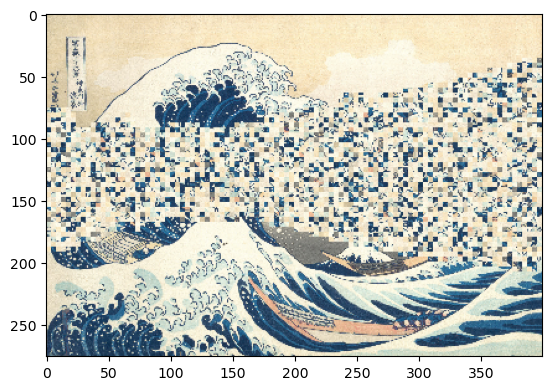

In [22]:
def bad_apple_cj_qual(frame: np.ndarray, fps: float, image: Image.Image, ordering: List[int], tile_size: Tuple[int, int], ims: List[Image.Image]):

    _, frame = cv2.threshold(frame, 127, 255, cv2.THRESH_BINARY)
    print(frame)
    tile_width, tile_height = tile_size
    image_width, image_height = image.size

    rows = image_height // tile_height
    cols = image_width // tile_width

    image_modded = image.copy()

    for row in range(rows):
        for col in range(cols):

            # unscramble only if the frame at this point is white
            if frame[col, row] != 255:
                continue 

            new_tile_pos = np.copy(ordering[row * cols + col])
            
            new_row = new_tile_pos // cols
            new_col = new_tile_pos % cols    

            new_tile = image.crop((new_col * tile_width, new_row * tile_height, 
                                  (new_col + 1) * tile_width, (new_row + 1) * tile_height))

            image_modded.paste(new_tile, (col * tile_width, row * tile_height))
    
    res = 4
    frame = np.array(image_modded)
    # lower resolution first 
    frame = frame[::res, ::res, :]
    return frame

ims = extract_frames(file_path=file_path, frames=100, 
                     func=bad_apple_cj_qual, frame_size=frame_size, 
                     image=image, ordering=ordering, tile_size=tile_size, ims=ims)

ani = animation.ArtistAnimation(fig, ims, interval=30, blit=True, repeat_delay=1000)
plt.tight_layout()
plt.show()
